# Baby Births Data Analysis

This assessment uses data from the United States Social Security Administration (SSA) which contains names of babies born between 1991 and 2010

In particular, we are provided with yearly files, from “yob1991.csv’ all the way to “yob2010.csv”. Each of these files contains information such as name, sex, total number and the year of births.

The objectives of this assessment are as follows:
1. Data handling by combining multiple datasets
2. Visualize the total male and female babies over time
3. Tabulate the most and least popular baby names
4. Analyze trends in names.

## Task 1:
Write a loop to concatenate (vertically) each of these files to form one big file. Call this big file as ‘full_data’. Using the data, compute the following statistics and report them as Table 1: (a) total number of observations, (b) total unique names, (c) total births, and (d) average births per unique name.



In [2]:
lst=['yob1991.csv','yob1992.csv','yob1993.csv','yob1994.csv','yob1995.csv','yob1996.csv','yob1997.csv','yob1998.csv','yob1999.csv','yob2000.csv','yob2001.csv','yob2002.csv','yob2003.csv','yob2004.csv','yob2005.csv','yob2006.csv','yob2007.csv','yob2008.csv','yob2009.csv','yob2010.csv']
import pandas as pd 
full_data=[]
for i in lst:
    full_data.append(pd.read_csv(i))
data=pd.concat(full_data,ignore_index=True)
data.head()

,name,sex,births,year
0,Ashley,F,43482,1991
1,Jessica,F,43396,1991
2,Brittany,F,29091,1991
3,Amanda,F,28884,1991
4,Samantha,F,25648,1991


Total observation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596931 entries, 0 to 596930
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    596931 non-null  object
 1   sex     596931 non-null  object
 2   births  596931 non-null  int64 
 3   year    596931 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 18.2+ MB


Total Observation
596931 

Unique names

In [4]:
unique=data['name'].unique()
s=pd.Series(unique)
s.count()

66648

In [5]:
data.groupby('name')['births'].mean()

name
Aaban         6.666667
Aabid         5.000000
Aabriella     5.000000
Aadam         7.235294
Aadan        13.800000
               ...    
Zyshonne     16.833333
Zytavious     6.142857
Zyvion        5.000000
Zyyanna       6.000000
Zzyzx         5.000000
Name: births, Length: 66648, dtype: float64

In [6]:
data['name'].value_counts()

Ashley       40
Bobbie       40
Alex         40
Jael         40
Bryan        40
             ..
Deshera       1
Floria        1
Deangelis     1
Melenaite     1
Zzyzx         1
Name: name, Length: 66648, dtype: int64

Total unique Name are
66648

Total births

In [7]:
data['births'].sum()

75509584

Total births are  75509584

In [8]:
 pd.DataFrame({'Total Observation':[596931],'Total unique Names':[66648],'Total births':[75509584]})

,Total Observation,Total unique Names,Total births
0,596931,66648,75509584


## Task 2:
Create a pivot table of total births by sex and year and then plot them as Figure 1.

In [27]:
# pd.pivot_table(data, index=["Survived"], columns=["Sex"], values=["Fare"], aggfunc="mean")
import matplotlib.pyplot as plt
import numpy as np
Total_birth_by_year_and_sex=pd.pivot_table(data,index='year',columns='sex' ,values='births', aggfunc='sum')
Females=Total_birth_by_year_and_sex["F"]
Females


year
1991    1874110
1992    1842818
1993    1807795
1994    1784407
1995    1757240
1996    1751681
1997    1739331
1998    1765390
1999    1772139
2000    1813960
2001    1798284
2002    1794358
2003    1824406
2004    1833005
2005    1843890
2006    1896468
2007    1916888
2008    1883645
2009    1827643
2010    1759010
Name: F, dtype: int64

Text(0.5, 1.0, 'Female births vs year')

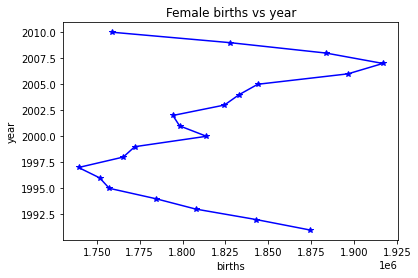

In [44]:
plt.plot(Females.values,Females.index,color='b',marker='*')
plt.xlabel("births")
plt.ylabel("year")
plt.title("Female births vs year")

Text(0.5, 1.0, 'Male births vs year')

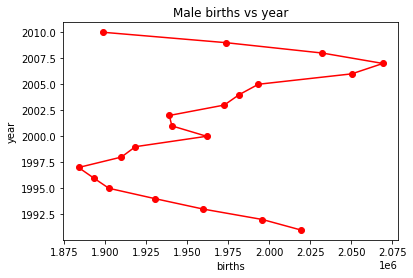

In [43]:
Males=Total_birth_by_year_and_sex["M"]
plt.plot(Males.values,Males.index,color='r',marker='o')
plt.xlabel("births")
plt.ylabel('year')
plt.title("Male births vs year")


## Task 3:
Calculate the total births over the sample period by grouping the data by name and sex. Subset the group into male and female. Using these subsets, select the top and bottom 3 male and female names. In total, you should have 12 names in total. Report them as Table 2.

In [11]:
Total_birth_by_name_and_sex=data.pivot_table(index=['sex','name'],values='births',aggfunc='sum')
males=Total_birth_by_name_and_sex.loc['M']
males

,births
name,
Aaban,20
Aabid,5
Aadam,123
Aadan,69
Aadarsh,109
...,...
Zyshon,19
Zyshonne,101
Zytavious,43


In [12]:
males.sort_values(by='births')

,births
name,
Zzyzx,5
Danielson,5
Daniellee,5
Montanez,5
Montaye,5
...,...
Christopher,524853
Joshua,532545
Matthew,541870


In [13]:
females=Total_birth_by_name_and_sex.loc['F']
females.sort_values(by='births')

,births
name,
Aabriella,5
Aviyonna,5
Kenra,5
Kenshayla,5
Kenshia,5
...,...
Sarah,328587
Samantha,340527
Jessica,350232


In [14]:
pd.DataFrame({'Top 3 Males':['Michael','Jacob','Matthew'],
'Top 3 Females':['Emily','Ashley','Jessica'],
'Bottom 3 Males':['Zzyzx','Danielson','Daniellee'],
'Botthom 3 Females':['Aabriella','Aviyonna','Kenra']})

,Top 3 Males,Top 3 Females,Bottom 3 Males,Botthom 3 Females
0,Michael,Emily,Zzyzx,Aabriella
1,Jacob,Ashley,Danielson,Aviyonna
2,Matthew,Jessica,Daniellee,Kenra


## Task 4:
Using the top male and female names (two names in total), check their trends over time, i.e. plot the total births with these names from 1991 to 2010 as Figure 2. In order to do this, you would first need to create a pivot table

In [15]:
top_1_male_and_1_female_data=data[(data['name']=='Michael')|(data['name']=='Emily')]
pivot_table=top_1_male_and_1_female_data.pivot_table(index=['name','year'],values=['births'])
pivot_table

births
name    year         
Emily   1991  10172.0
        1992  10932.5
        1993  11816.0
        1994  12089.5
        1995  12208.5
        1996  12589.0
        1997  12882.5
        1998  13106.0
        1999  13289.5
        2000  12989.5
        2001  12540.0
        2002  12242.0
        2003  12859.5
        2004  12563.5
        2005  11970.0
        2006  10698.0
        2007   9674.5
        2008   8711.5
        2009   7656.5
        2010   7096.0
Michael 1991  30523.5
        1992  27311.0
        1993  24886.0
        1994  22326.5
        1995  20781.5
        1996  19258.0
        1997  18842.0
        1998  18366.0
        1999  17009.0
        2000  16065.0
        2001  14881.0
        2002  14157.5
        2003  13590.0
        2004  12782.0
        2005  11917.5
        2006  11328.0
        2007  10983.0
        2008  10289.5
        2009   9431.5
        2010   8585.0

Text(0.5, 1.0, 'Number of births of females having name Emily vs year')

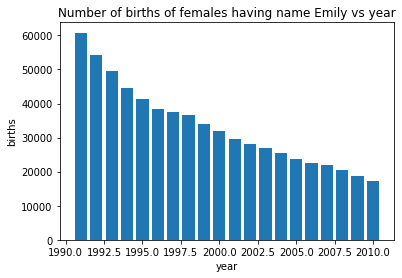

In [16]:
top_male_data=data[data['name']=='Michael']
plt.bar(top_male_data['year'],top_male_data['births'])
plt.xlabel("year")
plt.ylabel("births")
plt.title("Number of births of females having name Emily vs year")

Text(0.5, 1.0, 'Number of births of females having name Emily vs year')

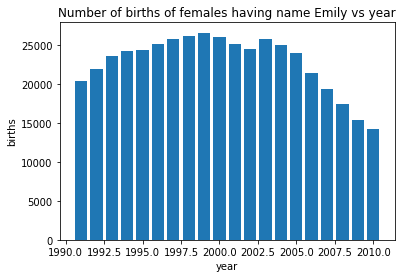

In [17]:
top_female_data=data[data['name']=='Emily']
plt.bar(top_female_data['year'],top_female_data['births'])
plt.xlabel("year")
plt.ylabel("births")
plt.title("Number of births of females having name Emily vs year")